In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/soumy/Desktop/Excelr/New folder/6. MLR/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

## EDA

In [3]:
df.info() #understanding the dataset like the datatypes, presence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
print(df['Fuel_Type'].unique()) 

['Diesel' 'Petrol' 'CNG']


In [5]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [6]:
df.describe() #only uses numeric columns

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### Cleaning the dataset


In [7]:
#look for missing values, i.e null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

No Missing value present in df

In [8]:
#remove duplicates if any
df.duplicated().sum()


1

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
# Confirm removal
df.duplicated().sum() 

0

Duplicate row removed

In [11]:
# Renaming 'Age_08_04' to 'Age'
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

#checking for changes
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

### Univariate analysis

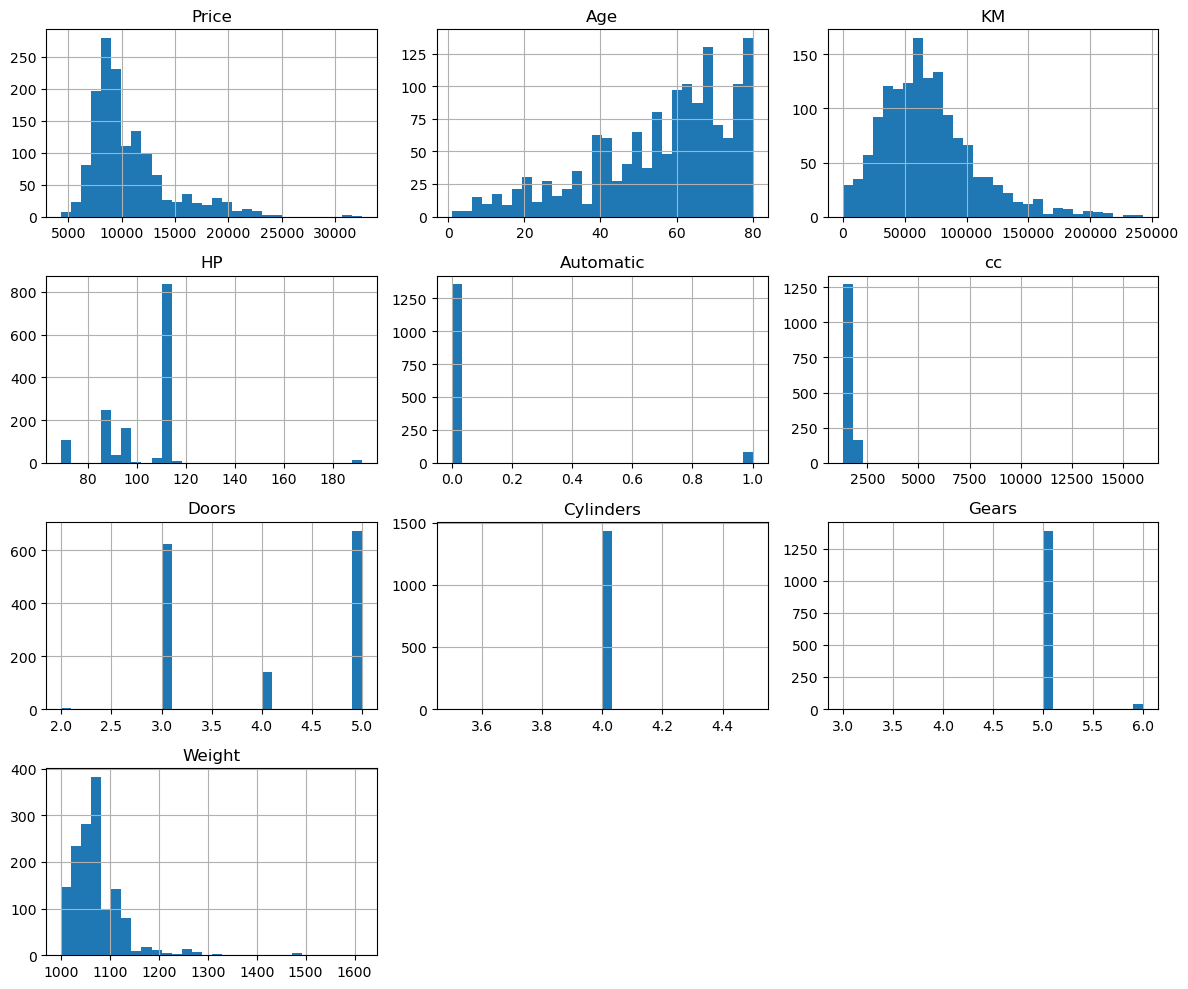

In [12]:
#Look at distribution of each variable
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()


- Price: The distribution is right-skewed, with most cars priced below 10,000, and a decreasing number of cars at higher price points.
- Age: The distribution suggests a higher frequency of older cars (around 60-80 years) in the dataset.
- KM (Kilometers Driven): The distribution is right-skewed, with a large concentration of cars having driven fewer kilometers, and fewer cars with very high mileage.
- HP (Horsepower): The histogram shows distinct peaks, indicating common horsepower ranges, with a notable peak around 100 HP.
- Automatic: This appears to be a binary variable, with a significantly higher number of non-automatic cars (value 0.0) compared to automatic cars (value 1.0).
- CC (Cubic Capacity): The data is heavily concentrated at lower CC values, with a sharp decline as CC increases.
- Doors: The most common number of doors is 5, followed by 3, with other door configurations being less frequent.
- Cylinders: The majority of cars have 4 cylinders.
- Gears: The most common number of gears is 5, with a smaller number of cars having 6 gears and very few with other gear counts. The distribution is heavily skewed to the left, with a prominent peak around 1050-1080.

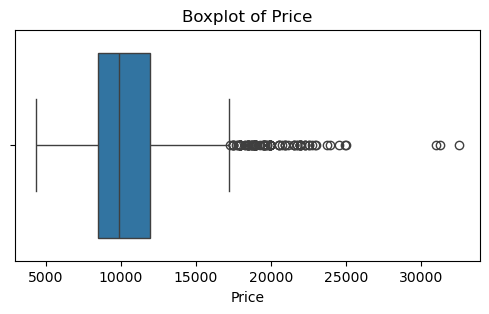

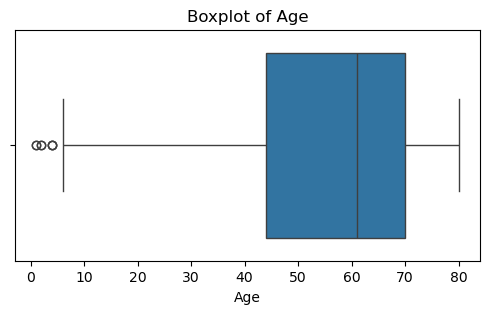

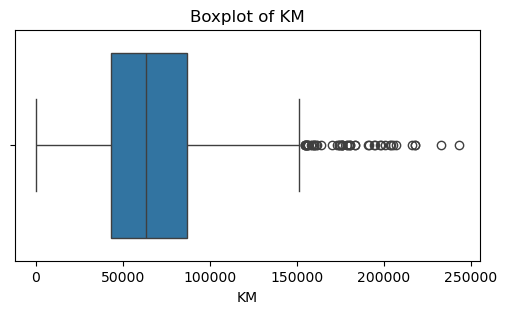

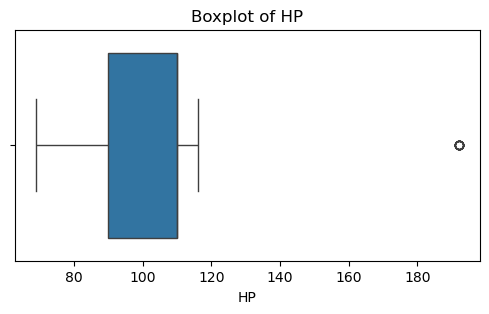

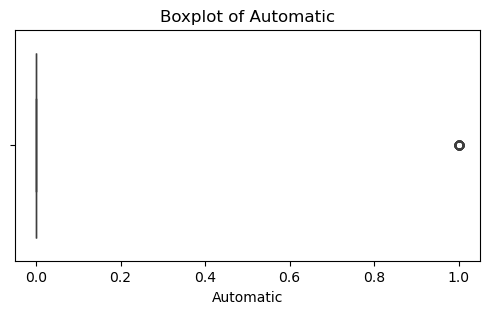

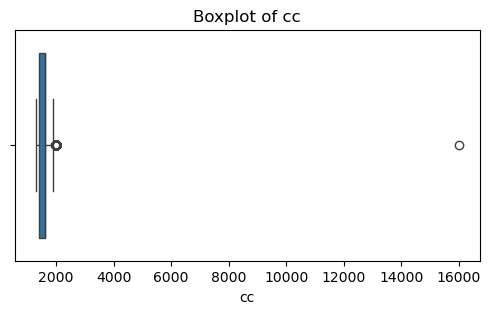

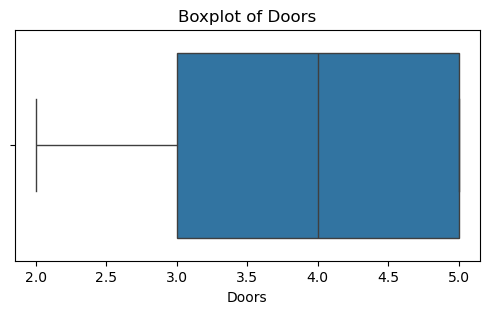

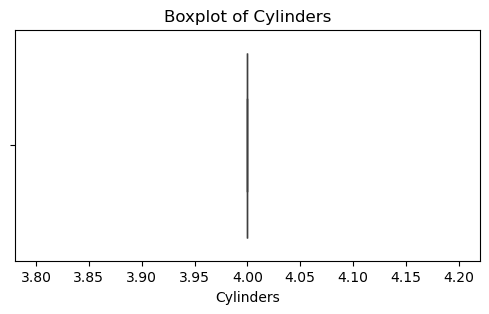

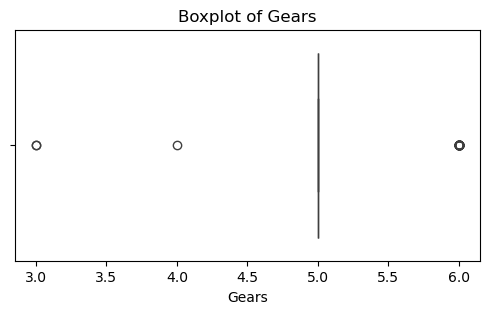

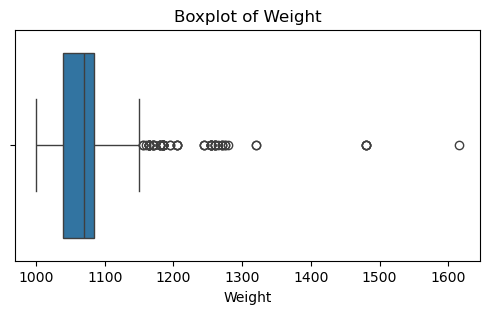

In [13]:
# Boxplots to detect outliers

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#boxplot for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


The 'Price', 'KM', 'Weight' column have many outliers.

### Bivariate Analysis

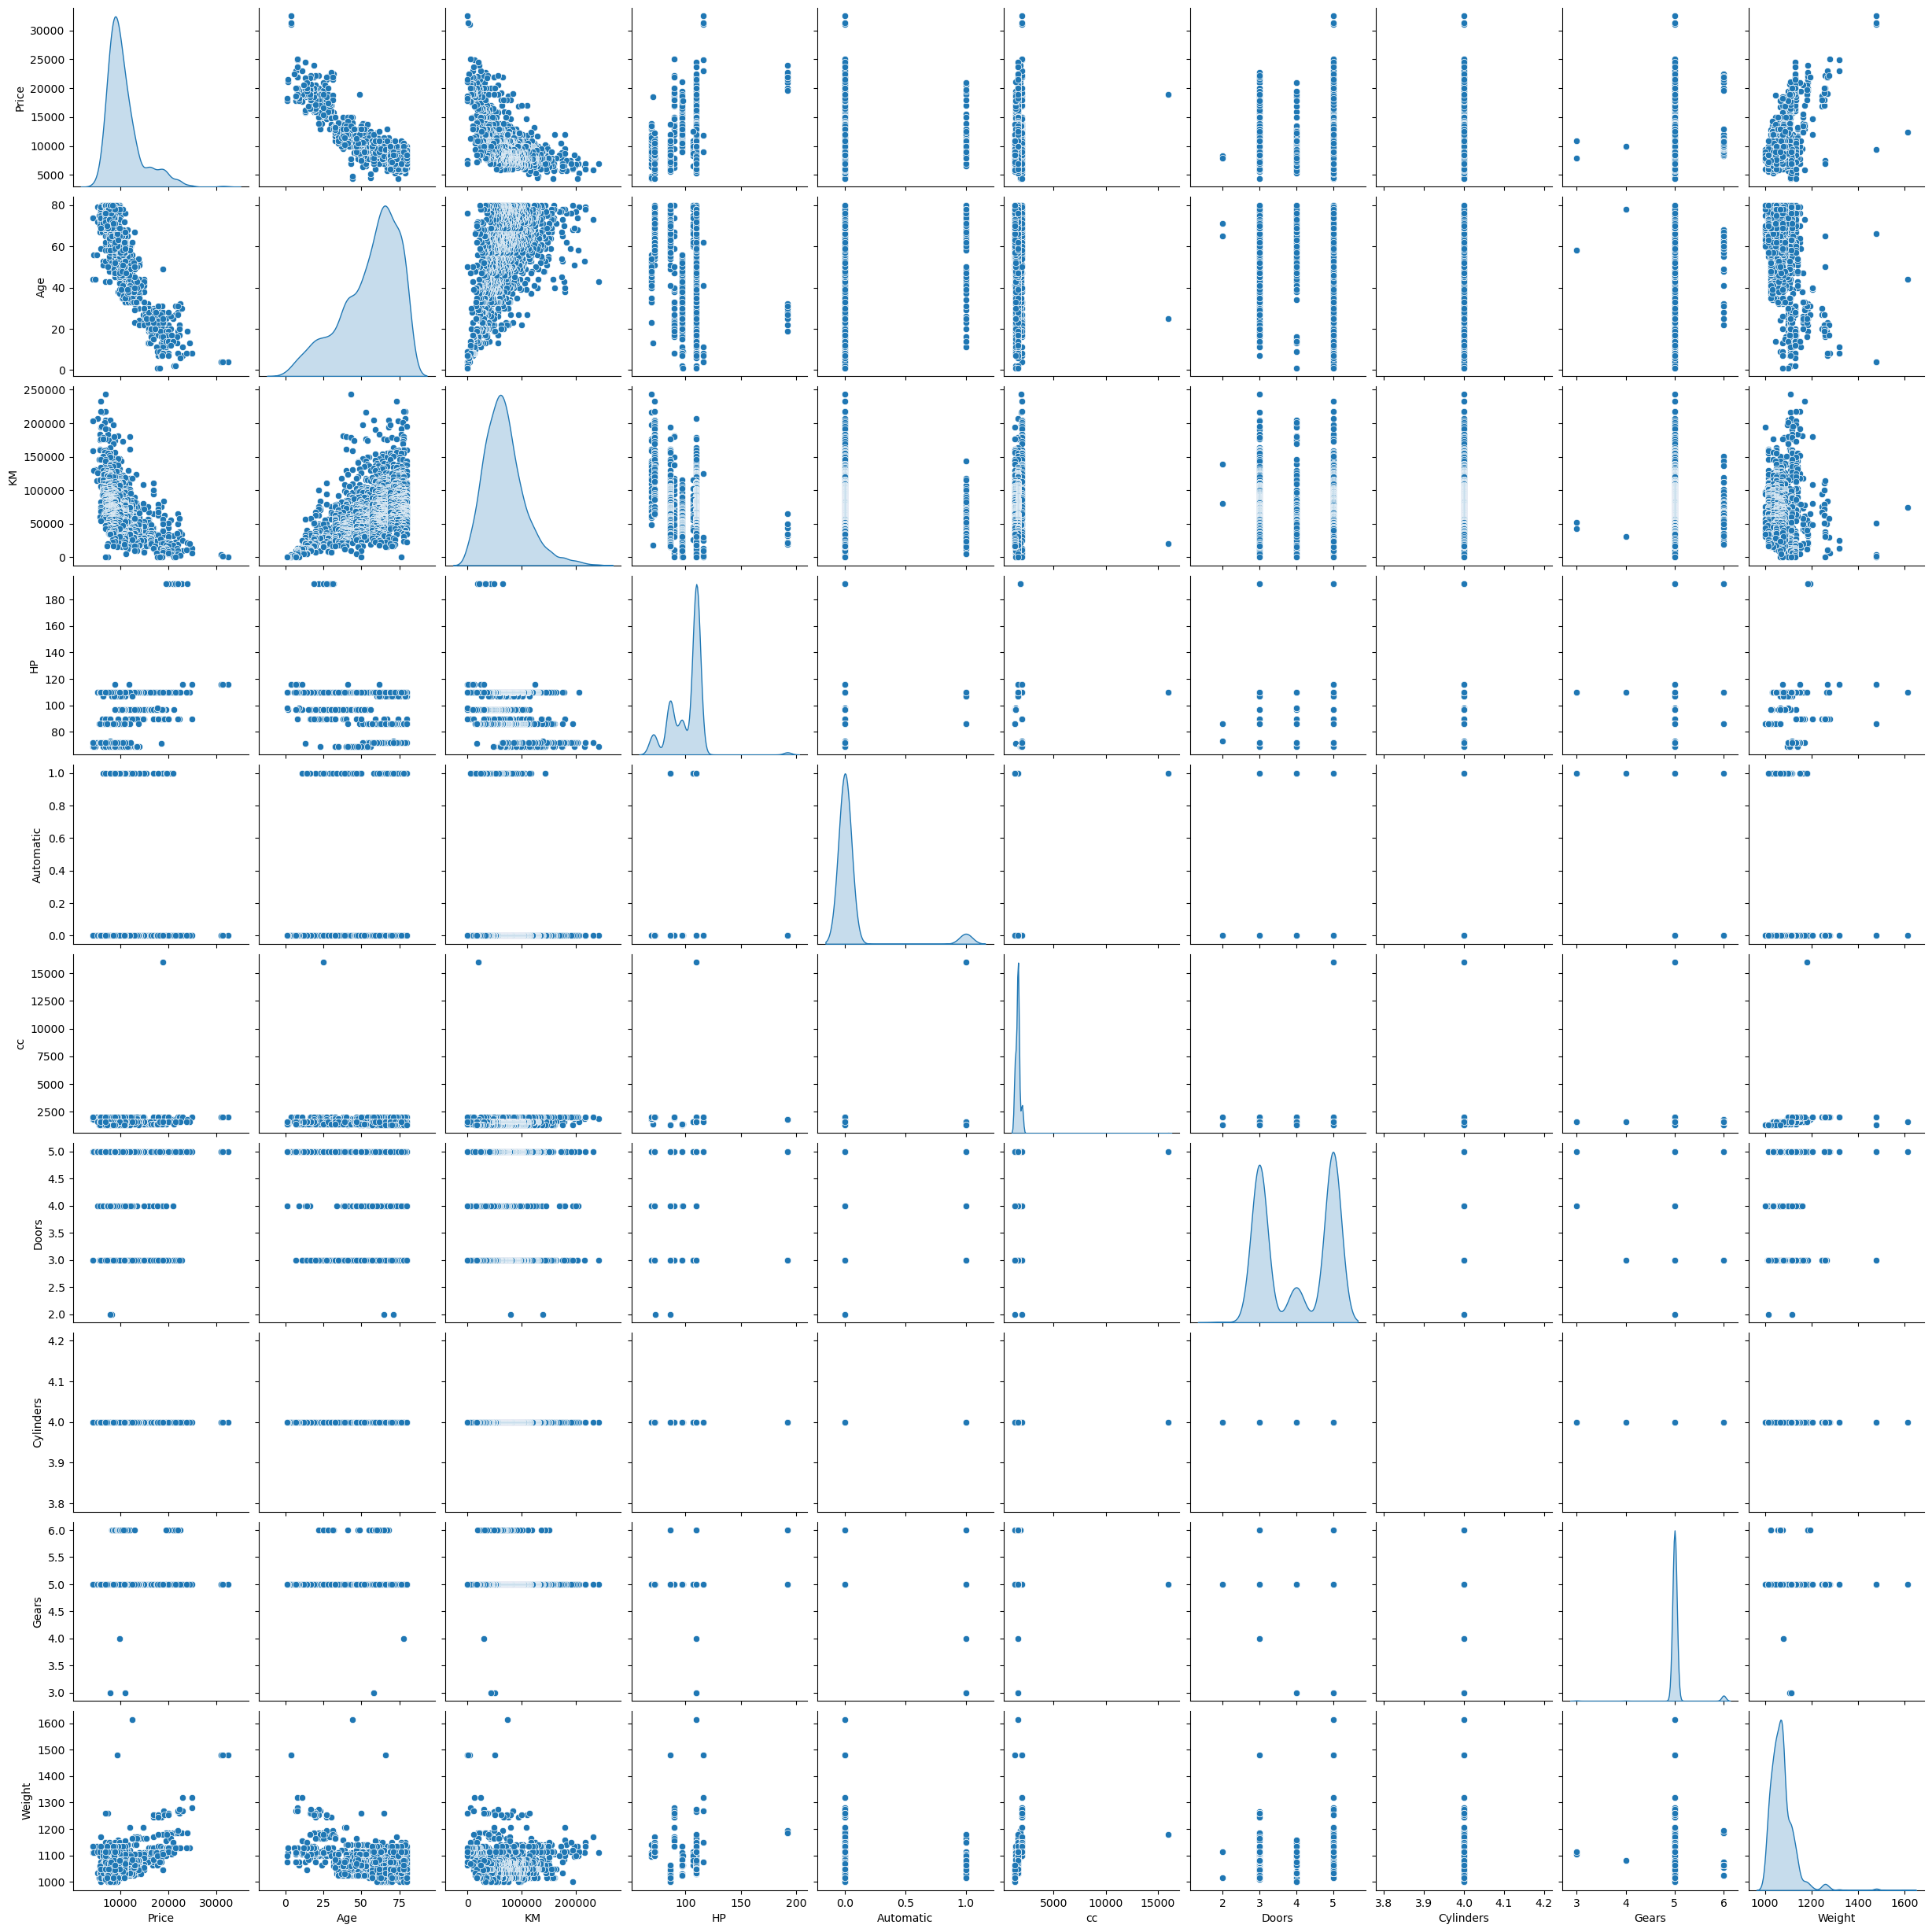

In [14]:
#Numeric vs target
sns.pairplot(df, diag_kind='kde')


<Axes: xlabel='KM', ylabel='Price'>

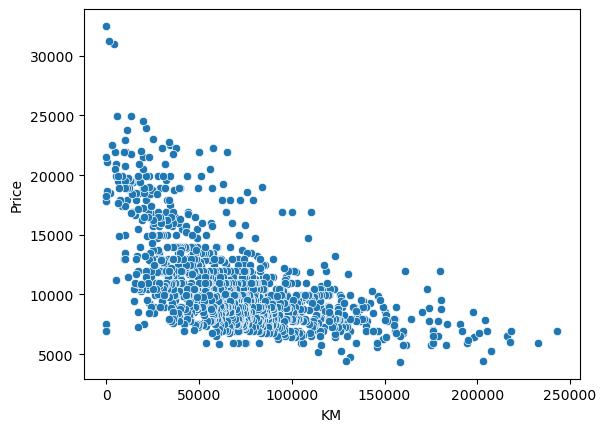

In [15]:
sns.scatterplot(x='KM', y='Price', data=df)


- The scatter plot illustrates a negative correlation between "KM" and "Price". 
- As the kilometer-driven increases, the price decreases.

<Axes: xlabel='Age', ylabel='Price'>

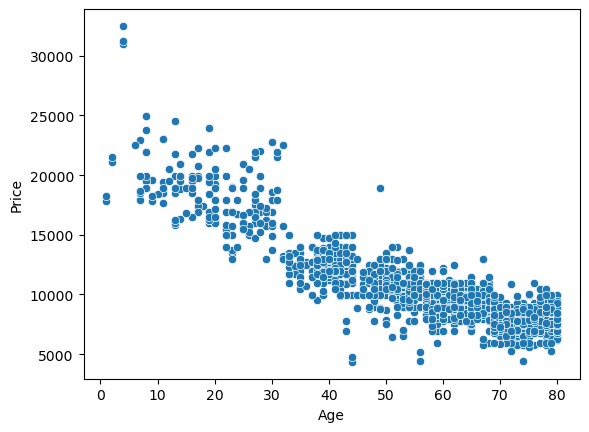

In [16]:
sns.scatterplot(x='Age', y='Price', data=df)


- The scatter plot illustrates a negative correlation between "Age" and "Price". 
- As the Age of the vehicle increases, the price decreases.

<Axes: xlabel='Weight', ylabel='Price'>

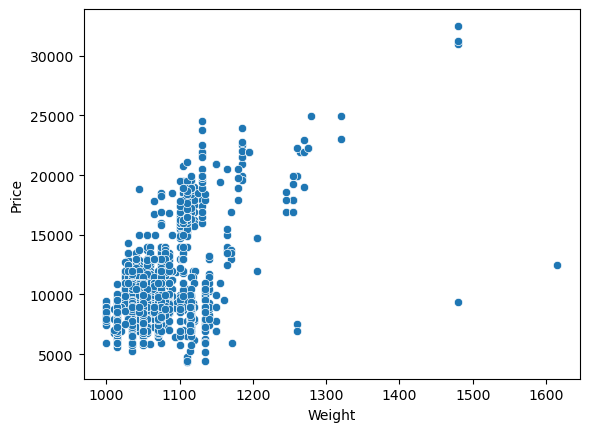

In [17]:
sns.scatterplot(x='Weight', y='Price', data=df)


- Postive coorelation between 'Weight' and 'Price'
- Likely because larger/heavier cars are often premium models.



#### Categorical vs Target

<Axes: xlabel='Fuel_Type', ylabel='Price'>

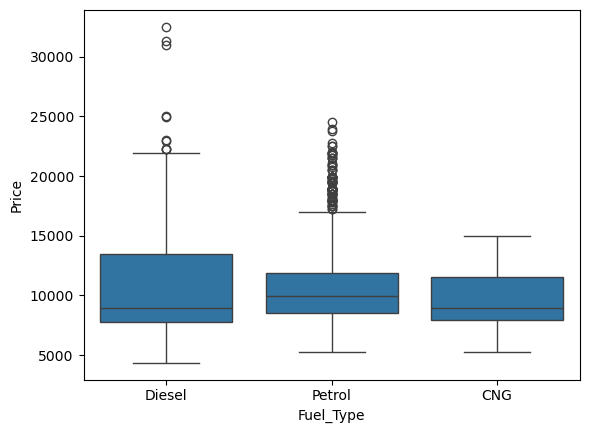

In [18]:
#Compare means/medians across categories
sns.boxplot(x='Fuel_Type', y='Price', data=df)


- Diesel > Petrol > CNG in terms of average/median price.

- CNG appears to be the most economical option in this dataset.

- Diesel shows a broader range of prices, suggesting it's found in both economy and premium models.

- Presence of outliers in all categories — particularly Diesel and Petrol.

<Axes: xlabel='Automatic', ylabel='Price'>

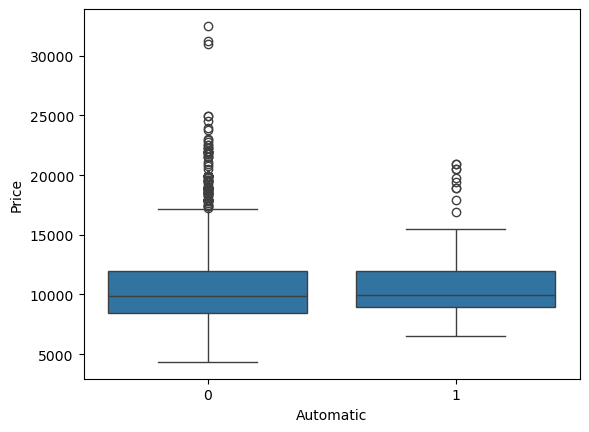

In [19]:
# Compare means/medians across categories
sns.boxplot(x='Automatic', y='Price', data=df)


- 0: manual
  1: automatic
- Manual cars are more common and vary widely in price.
- Automatic cars tend to be more expensive but price is less spread out.

### Correlation Matrix

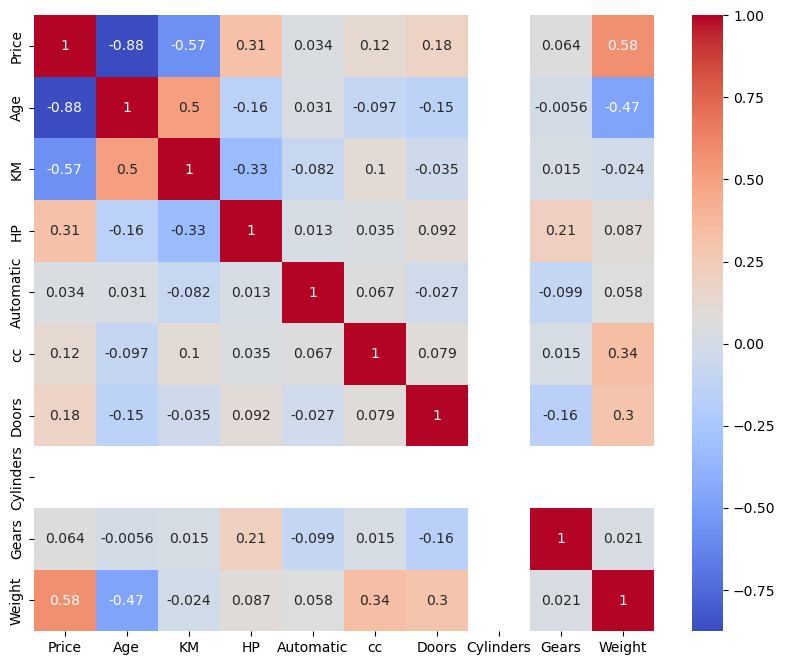

In [20]:
#See linear relationships between variables
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


- Age:
Very strong negative correlation. Older cars = lower price. So this is a Important predictor.
- KM:
Moderate negative correlation. Higher mileage = lower price. So this is a Useful predictor.
- Weight: 
Moderate positive correlation. Heavier = more expensive. We shold Include this.


## Data Pre-processing

### Handling outliers


In [21]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers
price_outliers = detect_outliers('Price')
km_outliers = detect_outliers('KM')
weight_outliers = detect_outliers('Weight')
hp_outliers = detect_outliers('HP')

# Count of outliers
print('Price Outliers:', price_outliers.shape[0])
print('KM Outliers:', km_outliers.shape[0])
print('Weight Outliers:', weight_outliers.shape[0])
print('HP Outliers:', hp_outliers.shape[0])


Price Outliers: 109
KM Outliers: 49
Weight Outliers: 65
HP Outliers: 11


In [22]:
# treating outliers

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Apply to your outlier columns
for col in ['Price', 'KM', 'Weight','HP']:
    cap_outliers(df, col)


### Encode Categorical Features

In [23]:
# One-hot encode FuelType
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


In [24]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [25]:
# Ensure 'Automatic' is integer
df['Automatic'] = df['Automatic'].astype(int)
print(df['Automatic'].dtypes)


int32


### Check Multicollinearity (VIF)

In [26]:
X = df.drop(columns=['Price']) #creating a new DataFrame X, while keeping df unchanged.


In [27]:
# calculate VIF 

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_const = add_constant(X)



In [28]:
print(X_const.dtypes)


Age                   int64
KM                  float64
HP                    int64
Automatic             int32
cc                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


In [29]:
# Convert bool to int (True/False → 1/0)
X_const = X_const.astype({ 
    'Fuel_Type_Diesel': 'int64', 
    'Fuel_Type_Petrol': 'int64' 
})
print(X_const.dtypes)


Age                   int64
KM                  float64
HP                    int64
Automatic             int32
cc                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_Diesel      int64
Fuel_Type_Petrol      int64
dtype: object


In [30]:
print(X_const.isnull().sum())


Age                 0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [31]:
# calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

             Feature          VIF
0                Age     2.160154
1                 KM     1.997644
2                 HP     2.587306
3          Automatic     1.161131
4                 cc     1.248330
5              Doors     1.406993
6          Cylinders  3213.183819
7              Gears     1.098909
8             Weight     4.130760
9   Fuel_Type_Diesel    11.662198
10  Fuel_Type_Petrol     9.783297


##### VIF Value Interpretation

- 1= No multicollinearity
- 1 to 5= Moderate, acceptable
- 5 to 10= Potential multicollinearity, monitor closely
- greater than 10= Serious multicollinearity — should drop 

'Cylinders' and 'Fuel_Type_Diesel' has values bigger than 10. So we will drop them.


In [32]:
#dropping columns according to VIF 

df.drop(columns=['Cylinders'], inplace=True)
df.drop(columns=['Fuel_Type_Diesel'], inplace=True)


In [33]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_Petrol'],
      dtype='object')

In [34]:
#recheck vif



# Define features (drop the target if still present)
X = df.drop(columns=['Price'])

# Add constant
X_const = add_constant(X)

# Convert boolean columns to integers
X_const = X_const.astype({col: 'int64' for col in X_const.select_dtypes(include='bool').columns})

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)


            Feature          VIF
0             const  3167.454504
1               Age     2.140689
2                KM     1.995660
3                HP     2.045170
4         Automatic     1.135855
5                cc     1.219006
6             Doors     1.387561
7             Gears     1.097577
8            Weight     3.689517
9  Fuel_Type_Petrol     4.020508


Its fine with const= 3167. usually it has high vif score

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [35]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=['Price'])   # all columns except target
y = df['Price']                  # target variable

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,              # 20% for testing
    random_state=42            # ensures reproducibility
)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1148, 9)
X_test shape: (287, 9)
y_train shape: (1148,)
y_test shape: (287,)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Model 1

In [37]:
# Model 1: All features
model1 = LinearRegression()

In [38]:
# training the model
model1.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model 2

In [39]:
# Model 2: Best predictor features

selected = ['Age', 'KM', 'Weight']  # best features
model2 = LinearRegression()

#training the model
model2.fit(X_train[selected], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model 3

In [40]:
# Model 3: Second best predictor features

selected_2 = ['Age', 'KM', 'Weight', 'HP']  # second best features
model3 = LinearRegression()

#training the model
model3.fit(X_train[selected_2], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [41]:
#predicting all three models

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test[selected])
y_pred3 = model3.predict(X_test[selected_2])

In [42]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("R² Score: " , np.round(r2_score(y_true, y_pred),3))
    print("MSE     : " , np.round(mean_squared_error(y_true, y_pred),3))
    print("RMSE    : " , np.round(np.sqrt(mean_squared_error(y_true, y_pred)),3))

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y_test, y_pred2, "Model 2")
evaluate_model(y_test, y_pred3, "Model 3")




Evaluation for Model 1:
R² Score:  0.854
MSE     :  1248429.979
RMSE    :  1117.332

Evaluation for Model 2:
R² Score:  0.845
MSE     :  1324718.769
RMSE    :  1150.964

Evaluation for Model 3:
R² Score:  0.846
MSE     :  1309178.423
RMSE    :  1144.193


- Model 1 demonstrates the best overall performance, with the highest R² and lowest error metrics. It explains 85.4% of the variance in car prices, with an average error of approximately 1117. 

- Model 2, though simpler (only using Age, KM, and Weight), still performs quite well. It explains 84.5% of the variance, with a slightly higher RMSE of 1151. 

- Model 3 improves slightly upon Model 2 by including the HP variable. It achieves a marginally higher R² of 0.846 and a lower RMSE of 1144, indicating that HP adds some predictive power, but not enough to surpass the full-feature Model 1.



### Residual analysis

#### Model 1

In [43]:
## get the model residuals 
model1_resid = y_test - y_pred1

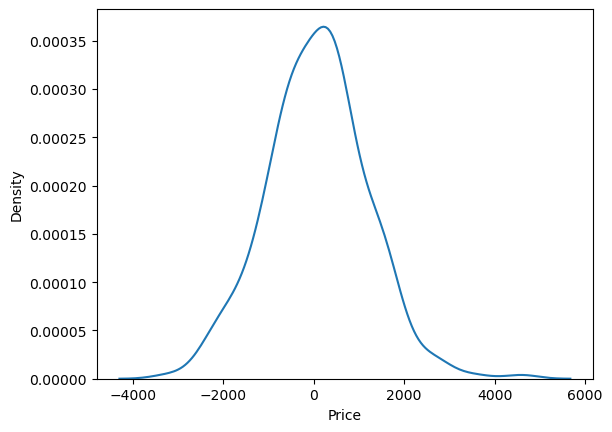

In [44]:
#test for normal distribution

sns.kdeplot(model1_resid)
plt.show()

Shows a normal distribution 

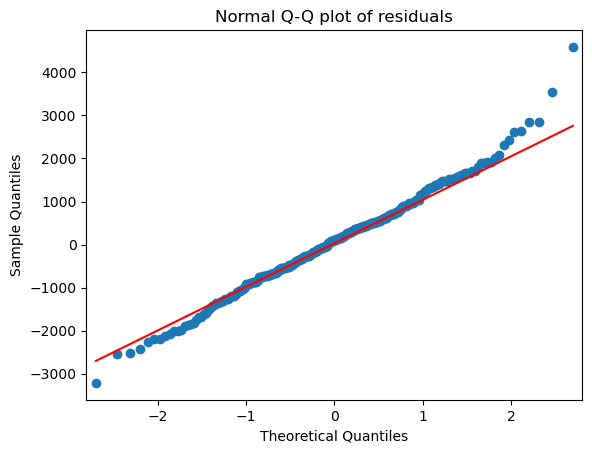

In [45]:
#statistical view of normality

import statsmodels.api as sm

qqplot = sm.qqplot(model1_resid, line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

- The points mostly follow the red diagonal line, i.e residuals are approximately normally distributed.
- A few deviations at the tails at both ends indicate Presence of a few outliers.

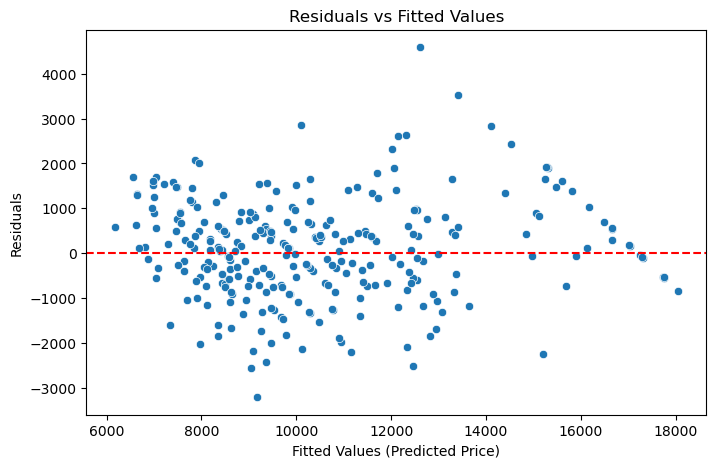

In [46]:
#check for homoscedasticity
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred1, y=model1_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

-  Homoscedasticity is mostly satisfied, i.e most points lie in between +3000 and -3000.
- A few points lie outside +3000 and -3000, those may be some influential points.

In [47]:
#Check for mean=0 or not
model1_resid.mean()

77.1707840786832

- 77 is very small compared to car prices mean= 10730, so this doesn’t indicate a serious problem.

### Model 2: Residual analysis 

In [48]:
## get the model residuals 
model2_resid = y_test - y_pred2

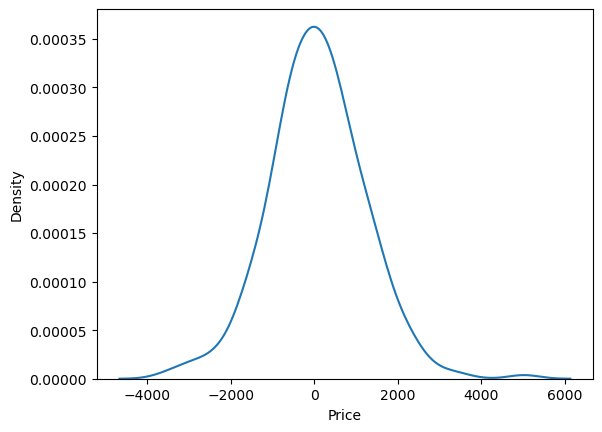

In [49]:
#test for normal distribution

sns.kdeplot(model2_resid)
plt.show()

Normal distribution achieved.

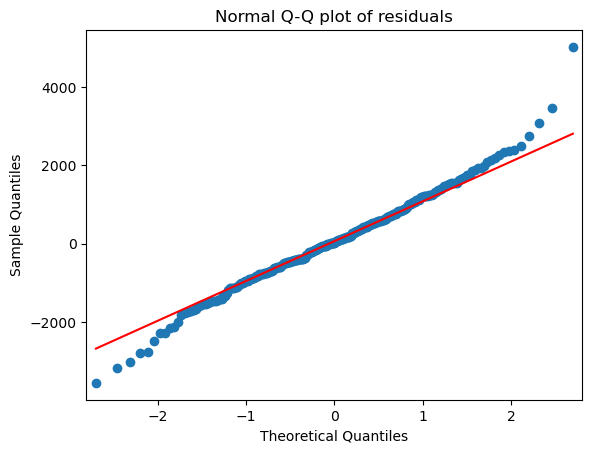

In [50]:
#statistical view of normality

qqplot = sm.qqplot(model2_resid, line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

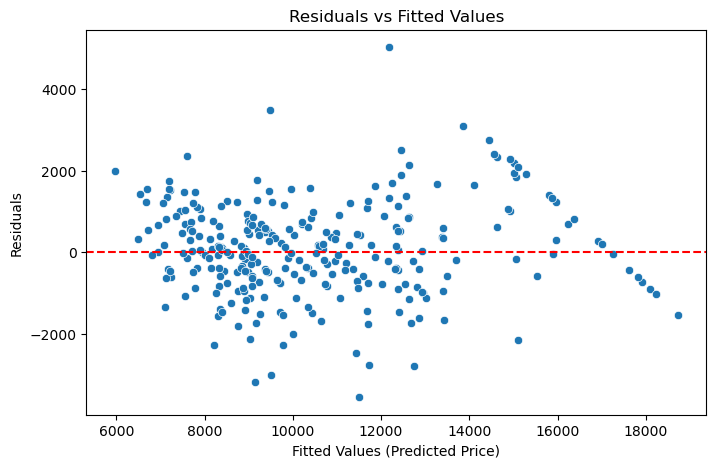

In [51]:
#check for homoscedasticity
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred2, y=model2_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

Most residuals fall between -3000 and +3000, which is typical in car price prediction.

In [52]:
#Check for mean=0 or not
model2_resid.mean()

70.64088755309193

Similar to Model-1

### Model 3: Residual analysis

In [53]:
## get the model residuals 
model3_resid = y_test - y_pred3

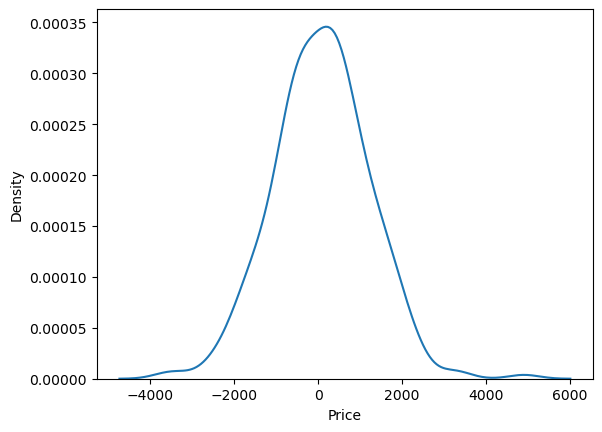

In [54]:
#test for normal distribution

sns.kdeplot(model3_resid)
plt.show()

- The curve is symmetric, indicating normality.

- Slightly tails on either side suggest mild kurtosis, but nothing extreme.



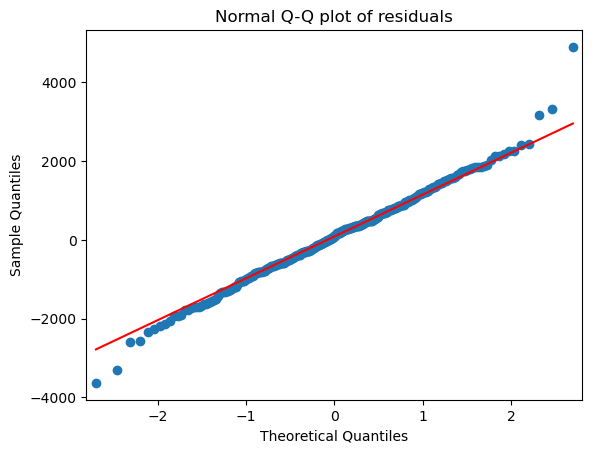

In [55]:
#statistical view of normality

qqplot = sm.qqplot(model3_resid, line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

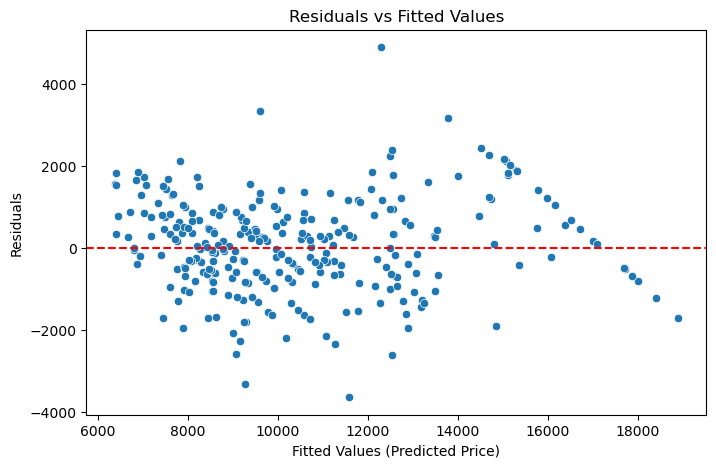

In [56]:
#check for homoscedasticity
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred3, y=model3_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [57]:
#Check for mean=0 or not
model3_resid.mean()

77.70332892417994

Residual analysis across three models, results same. This indicates
- Model assumptions are satisfied, i.e linearity, normality of residuals, and homoscedasticity.
- No major overfitting/underfitting.
- Prediction quality is stable.

# 5. Apply Ridge and Lasso

In [58]:
from sklearn.linear_model import Ridge,Lasso

In [61]:
ridge=Ridge()
lasso=Lasso()

In [62]:
ridge.fit(X_train,y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [67]:
predict = ridge.predict(X_test)


print("R2 Score ", r2_score(y_test, predict))
print('Mean Squared Error', mean_squared_error(y_test, predict))


R2 Score  0.8536135231841182
Mean Squared Error 1248421.484621932


In [68]:
lasso.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [69]:
predict = lasso.predict(X_test)
print("R2 Score ", r2_score(y_test, predict))
print('Mean Squared Error', mean_squared_error(y_test, predict))

R2 Score  0.8536740564660807
Mean Squared Error 1247905.2412408458


# Interview questions and answers

### 1. What is Normalization & Standardization and how is it helpful?

##### Normalization:

- Also called as Min-Max normalisation.
- Rescales the data into a range of [0, 1] or [-1, 1].
- Formula:

Nx =  (x - x_min)/(x_max - x_min) 


##### Standardization:

- Rescales data to have a mean = 0 and standard deviation = 1.
- Prevents features with larger scales from dominating the model.
- Standardized data should lie in the range of -3 to +3

Formula:

Zx = (x-u)/σ
     
- Normalization and Standardization are done to give equal importance to all data points.     





### 2. What techniques can be used to address multicollinearity in multiple linear regression?

- Multicollinearity occurs when independent variables are highly correlated, leading to unstable coefficients and reduced model interpretability.

##### Techniques to address it:

- Remove one of the correlated variables. Use correlation matrix or VIF (Variance Inflation Factor) to identify redundancy.

- Combine correlated variables. Use Principal Component Analysis (PCA) or create composite features.

- Regularization techniques:

Ridge Regression (L2): Shrinks coefficients, reduces the impact of multicollinearity.

Lasso Regression (L1): Can also remove irrelevant features by shrinking some coefficients to zero.

